In [308]:
import pandas as pd

In [309]:
df = pd.read_csv('beyonce_lyrics.csv')

In [310]:
df.head()

,artist,album,track_title,track_num,lyric,line,year
0,Beyoncé,Dangerously in Love,Crazy in Love,1,"Yes, so crazy right now",1,2003
1,Beyoncé,Dangerously in Love,Crazy in Love,1,"Most incredibly, it's your girl B",2,2003
2,Beyoncé,Dangerously in Love,Crazy in Love,1,"It's your boy, young",3,2003
3,Beyoncé,Dangerously in Love,Crazy in Love,1,History in the makin' part 2,4,2003
4,Beyoncé,Dangerously in Love,Crazy in Love,1,So crazy right now,5,2003


In [311]:
songs = df.groupby('track_title').agg({'lyric': lambda x: " ".join(x),
                                      'year': 'mean'}).reset_index()

In [304]:
songs['year']=songs['year'].astype(int)

In [305]:
pd.options.display.max_colwidth = 5000

In [306]:
songs.head()

,track_title,lyric,year,love,sex,heartbreak,party,independence
0,***Flawless,"Your challengers are a young group from Houston Welcome Beyoncé, Lativia, Nina, Nicky, Kelly, and Ashley The hip-hop-rappin' Girls' TYME! I'm out that H-Town, comin', comin' down I'm comin' down, drippin' candy on the ground H-H-Town-Town, I'm comin' down Comin' down, drippin' candy on the ground I know when you were little girls You dreamt of being in my world Don't forget it, don't forget it Respect that, bow down, bitches (Crown) I took some time to live my life But don't think I'm just his little wife Don't get it twisted, get it twisted This my shit, bow down, bitches Bow down, bitches, bow, bow down, bitches (Crown) Bow down, bitches, bow, bow down, bitches (Crown) H-Town vicious, H-H-Town vicious I'm so crown-crown, bow down, bitches I'm out that H-Town, comin', comin' down I'm comin' down, drippin' candy on the ground H-H-Town-Town, I'm comin' down Comin' down, drippin' candy on the ground We teach girls to shrink themselves, to make themselves smaller We say to girls: ""You can have ambition, but not too much You should aim to be successful, but not too successful Otherwise, you will threaten the man"" Because I am female, I am expected to aspire to marriage I am expected to make my life choices always keeping in mind that marriage is the most important (C-Candy on the ground) Now, marriage can be a source of joy and love and mutual support (Dum-da-dee-da) But why do we teach girls to aspire to marriage and we don't teach boys the same? (Do-da-da, do-do, do-do-do-da) We raise girls to see each other as competitors Not for jobs or for accomplishments, which I think can be a good thing (Com-com-comin' down, drippin' candy on the ground) But for the attention of men We teach girls that they cannot be sexual beings in the way that boys are (Dum-da-de-da) Feminist: A person who believes in the social, political, and economic equality of the sexes (Do-da-da, do-do, do-do-do-da) You wake up (Flawless), post up (Flawless) Riding 'round in it (Flawless), flossin' on that (Flawless) This diamond (Flawless), my diamond (Flawless) This rock (Flawless), my Roc (Flawless) I woke up like this, I woke up like this We flawless, ladies, tell 'em I woke up like this, I woke up like this We flawless, ladies, tell 'em Say, ""I look so good tonight"" Goddamn, goddamn Say, ""I look so good tonight"" Goddamn, goddamn, goddamn My mama taught me good home-trainin' My daddy taught me how to love my haters My sister told me I should speak my mind My man make me feel so goddamn fine, I'm flawless (Flawless) Riding 'round in it (Flawless), flossin' on that (Flawless) This diamond (Flawless), my diamond (Flawless) This rock (Flawless), my Roc (Flawless) I woke up like this, I woke up like this We flawless, ladies, tell 'em I woke up like this, I woke up like this We flawless, ladies, tell 'em Say, ""I look so good tonight"" (Right, right, right, right) Goddamn, goddamn Say, ""I look so good tonight"" (Right, right, right, right) Goddamn, goddamn, goddamn The judges give champion Skeleton Crew 4 stars, a perfect score The challenger, Girls' TYME, receives... 3 stars Skeleton Crew, champions once again Congratulations, we'll see you next week",2013,0.0,0.0,0.0,1.0,1.0
1,1+1,"If I ain't got nothing, I got you If I ain't got something, I don't give a damn Cause I got it with you I don't know much about algebra, but I know 1+1 equals 2 And it's me and you That's all we'll have when the world is through Cause baby, we ain't got nothing without love Darling, you got enough for the both of us So come on, baby, make love to me When my days look low Pull me in close and don't let me go, make love to me So when the world's at war, let our love heal us all Right now, baby, make love to me We, me, me, me Oh, make love to me Hey, I don't know much about guns, but I I've been shot by you, hey And I don't know when I'm gon' die, but I hope That I'm gon' die by you, hey And I don't know m

In [137]:
len(songs)

97

In [138]:
artist = df[df['artist']=='Beyoncé']

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [140]:
import nltk

In [141]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hillaryosei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [393]:
from nltk.corpus import stopwords

In [394]:
stop_words = stopwords.words('english')

In [395]:
stop_words.extend(['the', 'a', 'then', 'an', 'in', 'and', 'to', 'where', 'when', 'at', 'could', 'would', 'one', 'bout', 'oh', 'uh', 'huh', 'uh-huh', 'yeah', 'like', 'ooh', 'hey', 'yeah', 'wanna', 'got', 'yes', 'cause', 'gon', 'go', 'gonna', 'get', 'never', 'really', 'always', 'I', 'you', 'yours', 'my', 'mine', 'without', 'with', 'away', 'another', 'take', 'nobody', 'give', 'everything', 'come', 'say', 'around', 'every', 'make', 'nothing', 'leave', 'still', 'move', 'go', 'stop', 'hear', 'done', 'left', 'something', 'ah', 'thought', 'think', 'left', 'right', 'little', 'even', 'try', 'way', 'ever', 'need', 'things', 'name', 'hold', 'enough', 'feel', 'light', 'much', 'keep', 'mind', 'em', 'goes', 'us', 'feeling', 'damn', 'turn', 'first', 'last', 'thing', 'best', 'wait', 'find', 'made', 'said', 'want', 'put', 'let', 'look', 'inside', 'back', 'next', 'gotta', 'stay', 'tell', 'words', 'life', 'real', 'wish', 'see', 'pull', 'time', 'big', 'til', 'good', 'bad'
])

In [396]:
vectorizer = TfidfVectorizer(stop_words = stop_words , min_df = 0.1)

In [417]:
from sklearn.decomposition import NMF

In [418]:
nmf = NMF(n_components = 5)

In [419]:
tfidf = vectorizer.fit_transform(songs['lyric'])

In [420]:
topic_values = nmf.fit_transform(tfidf)

In [421]:
for topic_num, topic in enumerate(nmf.components_):
    message = "Topic#{}: ".format(topic_num+1)
    message += " ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11 :-1]])
    print(message)

Topic#1: love night eyes kiss crazy world lights bitch live show
Topic#2: baby boy ride rock face ass night girl lights daddy
Topic#3: know world home feels man long call hurt hit remember
Topic#4: girl tonight body babe girls boy party home daddy dance
Topic#5: ladies work money mama watch rock man better boy girls


In [422]:
topic_labels = ['love', 'sex', 'heartbreak', 'party', 'independence',]

In [423]:
df_topics = pd.DataFrame(topic_values, columns = topic_labels)
df_topics

,love,sex,heartbreak,party,independence
0,0.026089,0.000000,0.017104,0.182509,0.338060
1,0.312024,0.151701,0.229363,0.000000,0.000000
2,0.030356,0.018570,0.022386,0.000000,0.367445
3,0.191286,0.237782,0.066515,0.070803,0.026537
4,0.214061,0.000000,0.192957,0.001037,0.155954
...,...,...,...,...,...
92,0.000000,0.091942,0.071436,0.000000,0.448627
93,0.206318,0.395436,0.000000,0.040802,0.000000
94,0.031232,0.090391,0.138083,0.023190,0.147678
95,0.140068,0.225709,0.000000,0.000000,0.000000


In [425]:
songs = songs.join(df_topics)

ValueError: columns overlap but no suffix specified: Index(['love', 'sex', 'heartbreak', 'party', 'independence'], dtype='object')

In [426]:
songs.head()

,track_title,lyric,year,love,sex,heartbreak,party,independence
0,***Flawless,"Your challengers are a young group from Houston Welcome Beyoncé, Lativia, Nina, Nicky, Kelly, and Ashley The hip-hop-rappin' Girls' TYME! I'm out that H-Town, comin', comin' down I'm comin' down, drippin' candy on the ground H-H-Town-Town, I'm comin' down Comin' down, drippin' candy on the ground I know when you were little girls You dreamt of being in my world Don't forget it, don't forget it Respect that, bow down, bitches (Crown) I took some time to live my life But don't think I'm just his little wife Don't get it twisted, get it twisted This my shit, bow down, bitches Bow down, bitches, bow, bow down, bitches (Crown) Bow down, bitches, bow, bow down, bitches (Crown) H-Town vicious, H-H-Town vicious I'm so crown-crown, bow down, bitches I'm out that H-Town, comin', comin' down I'm comin' down, drippin' candy on the ground H-H-Town-Town, I'm comin' down Comin' down, drippin' candy on the ground We teach girls to shrink themselves, to make themselves smaller We say to girls: ""You can have ambition, but not too much You should aim to be successful, but not too successful Otherwise, you will threaten the man"" Because I am female, I am expected to aspire to marriage I am expected to make my life choices always keeping in mind that marriage is the most important (C-Candy on the ground) Now, marriage can be a source of joy and love and mutual support (Dum-da-dee-da) But why do we teach girls to aspire to marriage and we don't teach boys the same? (Do-da-da, do-do, do-do-do-da) We raise girls to see each other as competitors Not for jobs or for accomplishments, which I think can be a good thing (Com-com-comin' down, drippin' candy on the ground) But for the attention of men We teach girls that they cannot be sexual beings in the way that boys are (Dum-da-de-da) Feminist: A person who believes in the social, political, and economic equality of the sexes (Do-da-da, do-do, do-do-do-da) You wake up (Flawless), post up (Flawless) Riding 'round in it (Flawless), flossin' on that (Flawless) This diamond (Flawless), my diamond (Flawless) This rock (Flawless), my Roc (Flawless) I woke up like this, I woke up like this We flawless, ladies, tell 'em I woke up like this, I woke up like this We flawless, ladies, tell 'em Say, ""I look so good tonight"" Goddamn, goddamn Say, ""I look so good tonight"" Goddamn, goddamn, goddamn My mama taught me good home-trainin' My daddy taught me how to love my haters My sister told me I should speak my mind My man make me feel so goddamn fine, I'm flawless (Flawless) Riding 'round in it (Flawless), flossin' on that (Flawless) This diamond (Flawless), my diamond (Flawless) This rock (Flawless), my Roc (Flawless) I woke up like this, I woke up like this We flawless, ladies, tell 'em I woke up like this, I woke up like this We flawless, ladies, tell 'em Say, ""I look so good tonight"" (Right, right, right, right) Goddamn, goddamn Say, ""I look so good tonight"" (Right, right, right, right) Goddamn, goddamn, goddamn The judges give champion Skeleton Crew 4 stars, a perfect score The challenger, Girls' TYME, receives... 3 stars Skeleton Crew, champions once again Congratulations, we'll see you next week",2013.0,0.026105,0.000000,0.017089,1.000000,1.000000
1,1+1,"If I ain't got nothing, I got you If I ain't got something, I don't give a damn Cause I got it with you I don't know much about algebra, but I know 1+1 equals 2 And it's me and you That's all we'll have when the world is through Cause baby, we ain't got nothing without love Darling, you got enough for the both of us So come on, baby, make love to me When my days look low Pull me in close and don't let me go, make love to me So when the world's at war, let our love heal us all Right now, baby, make love to me We, me, me, me Oh, make love to me Hey, I don't know much about guns, but I I've been shot by you, hey And I don't know when I'm gon' die, but I hope That I'm gon' die by 

In [427]:
songs.loc[songs['love'] >= 0.1, 'love'] = 1
songs.loc[songs['sex'] >= 0.1, 'sex'] = 1
songs.loc[songs['heartbreak'] >= 0.1, 'heartbreak'] = 1
songs.loc[songs['party'] >= 0.1, 'party'] = 1
songs.loc[songs['independence'] >= 0.1, 'independence'] = 1

In [428]:
songs.loc[songs['love'] < 0.1, 'love'] = 0
songs.loc[songs['sex'] < 0.1, 'sex'] = 0
songs.loc[songs['heartbreak'] < 0.1, 'heartbreak'] = 0
songs.loc[songs['party'] < 0.1, 'party'] = 0
songs.loc[songs['independence'] < 0.1, 'independence'] = 0

In [429]:
songs.head()

,track_title,lyric,year,love,sex,heartbreak,party,independence
0,***Flawless,"Your challengers are a young group from Houston Welcome Beyoncé, Lativia, Nina, Nicky, Kelly, and Ashley The hip-hop-rappin' Girls' TYME! I'm out that H-Town, comin', comin' down I'm comin' down, drippin' candy on the ground H-H-Town-Town, I'm comin' down Comin' down, drippin' candy on the ground I know when you were little girls You dreamt of being in my world Don't forget it, don't forget it Respect that, bow down, bitches (Crown) I took some time to live my life But don't think I'm just his little wife Don't get it twisted, get it twisted This my shit, bow down, bitches Bow down, bitches, bow, bow down, bitches (Crown) Bow down, bitches, bow, bow down, bitches (Crown) H-Town vicious, H-H-Town vicious I'm so crown-crown, bow down, bitches I'm out that H-Town, comin', comin' down I'm comin' down, drippin' candy on the ground H-H-Town-Town, I'm comin' down Comin' down, drippin' candy on the ground We teach girls to shrink themselves, to make themselves smaller We say to girls: ""You can have ambition, but not too much You should aim to be successful, but not too successful Otherwise, you will threaten the man"" Because I am female, I am expected to aspire to marriage I am expected to make my life choices always keeping in mind that marriage is the most important (C-Candy on the ground) Now, marriage can be a source of joy and love and mutual support (Dum-da-dee-da) But why do we teach girls to aspire to marriage and we don't teach boys the same? (Do-da-da, do-do, do-do-do-da) We raise girls to see each other as competitors Not for jobs or for accomplishments, which I think can be a good thing (Com-com-comin' down, drippin' candy on the ground) But for the attention of men We teach girls that they cannot be sexual beings in the way that boys are (Dum-da-de-da) Feminist: A person who believes in the social, political, and economic equality of the sexes (Do-da-da, do-do, do-do-do-da) You wake up (Flawless), post up (Flawless) Riding 'round in it (Flawless), flossin' on that (Flawless) This diamond (Flawless), my diamond (Flawless) This rock (Flawless), my Roc (Flawless) I woke up like this, I woke up like this We flawless, ladies, tell 'em I woke up like this, I woke up like this We flawless, ladies, tell 'em Say, ""I look so good tonight"" Goddamn, goddamn Say, ""I look so good tonight"" Goddamn, goddamn, goddamn My mama taught me good home-trainin' My daddy taught me how to love my haters My sister told me I should speak my mind My man make me feel so goddamn fine, I'm flawless (Flawless) Riding 'round in it (Flawless), flossin' on that (Flawless) This diamond (Flawless), my diamond (Flawless) This rock (Flawless), my Roc (Flawless) I woke up like this, I woke up like this We flawless, ladies, tell 'em I woke up like this, I woke up like this We flawless, ladies, tell 'em Say, ""I look so good tonight"" (Right, right, right, right) Goddamn, goddamn Say, ""I look so good tonight"" (Right, right, right, right) Goddamn, goddamn, goddamn The judges give champion Skeleton Crew 4 stars, a perfect score The challenger, Girls' TYME, receives... 3 stars Skeleton Crew, champions once again Congratulations, we'll see you next week",2013.0,0.0,0.0,0.0,1.0,1.0
1,1+1,"If I ain't got nothing, I got you If I ain't got something, I don't give a damn Cause I got it with you I don't know much about algebra, but I know 1+1 equals 2 And it's me and you That's all we'll have when the world is through Cause baby, we ain't got nothing without love Darling, you got enough for the both of us So come on, baby, make love to me When my days look low Pull me in close and don't let me go, make love to me So when the world's at war, let our love heal us all Right now, baby, make love to me We, me, me, me Oh, make love to me Hey, I don't know much about guns, but I I've been shot by you, hey And I don't know when I'm gon' die, but I hope That I'm gon' die by you, hey And I don't know

In [430]:
year_topics = songs.groupby('year').sum().reset_index()

In [431]:
year_topics

,year,love,sex,heartbreak,party,independence
0,2003.0,9.0,7.0,5.0,2.0,2.0
1,2006.0,0.0,2.0,6.0,3.0,6.0
2,2008.0,2.0,3.0,7.0,2.0,3.0
3,2011.0,6.0,7.0,4.0,6.0,1.0
4,2013.0,4.0,7.0,6.0,6.0,2.0
5,2018.0,6.0,2.0,1.0,3.0,6.0
6,2022.0,6.0,6.0,3.0,6.0,3.0


In [432]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker

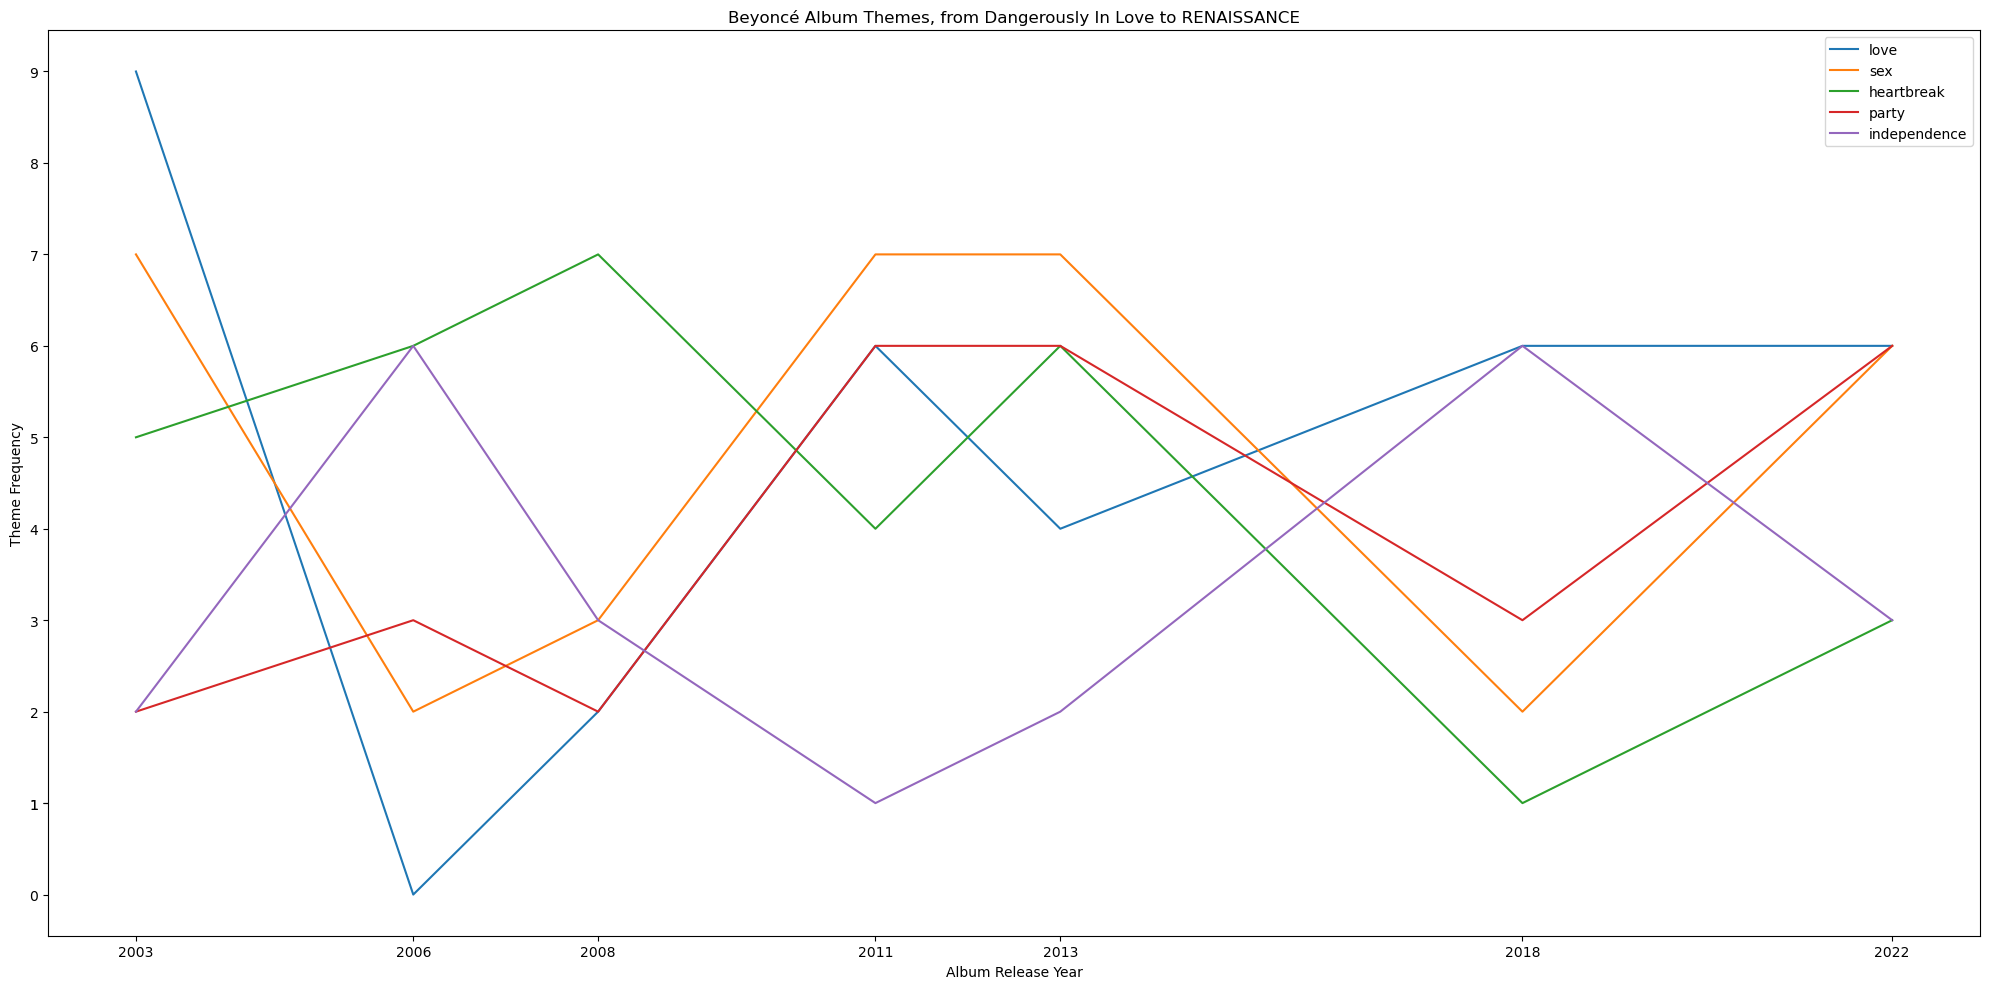

In [433]:
plt.figure(figsize=(20,10))
plt.title("Beyoncé Album Themes, from Dangerously In Love to RENAISSANCE")
plt.xlabel('Album Release Year')
plt.ylabel('Theme Frequency')

plt.xticks([2003,2006,2008,2011,2013,2018,2022])
plt.yticks([0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0, 1.0])
#plt.xticks(np.arange(min(x), 1+max(x), 1))
#matplotlib.ticker.MaxNLocator(nbins=7)
                              
plt.plot(year_topics['year'],year_topics['love'], label = 'love')
plt.plot(year_topics['year'],year_topics['sex'], label = 'sex')
plt.plot(year_topics['year'],year_topics['heartbreak'], label = 'heartbreak')
plt.plot(year_topics['year'],year_topics['party'], label = 'party')
plt.plot(year_topics['year'],year_topics['independence'], label = 'independence')
plt.legend()